# Bar Plots

Making bar plots instead of line plots is a simple as passing kind='bar' (for vertical bars) or kind='barh' (for horizontal bars). In this case, the Series or DataFrame index will be used as the X (bar) or Y (barh) ticks 

In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

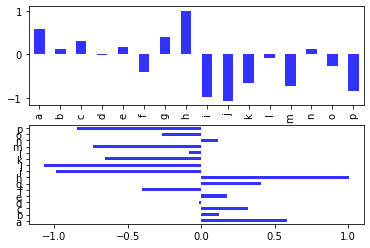

In [3]:
fig, axes = plt.subplots(2, 1)

data = Series(np.random.randn(16), index= list('abcdefghijklmnop'))

data.plot(kind = 'bar', ax = axes[0] ,color = 'b', alpha = .8)

data.plot(kind = 'barh', ax = axes[1] ,color = 'b', alpha = .8)

plt.show()

With a DataFrame, bar plots group the values in each row together in a group in bars, side by side, for each value.

In [4]:
df = DataFrame(np.random.rand(6, 4),
                index=['one', 'two', 'three', 'four', 'five', 'six'],
                columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [5]:
df

Genus,A,B,C,D
one,0.766348,0.063277,0.574714,0.669794
two,0.722146,0.047299,0.613338,0.334612
three,0.415832,0.884477,0.769735,0.555040
four,0.607483,0.048675,0.440517,0.062132
five,0.489378,0.827151,0.298665,0.469105
six,0.243589,0.649847,0.286477,0.486541


<AxesSubplot:>

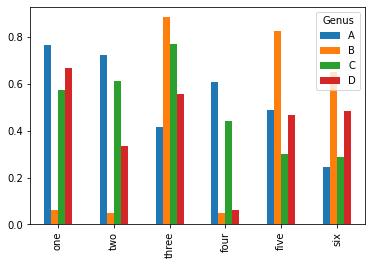

In [6]:
df.plot(kind = 'bar')

Note that the name “Genus” on the DataFrame’s columns is used to title the legend. Stacked bar plots are created from a DataFrame by passing stacked=True, resulting in the value in each row being stacked together 

<AxesSubplot:>

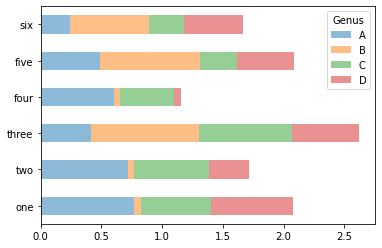

In [7]:
df.plot(kind='barh', stacked=True, alpha=0.5)

<AxesSubplot:xlabel='A,B,C,D'>

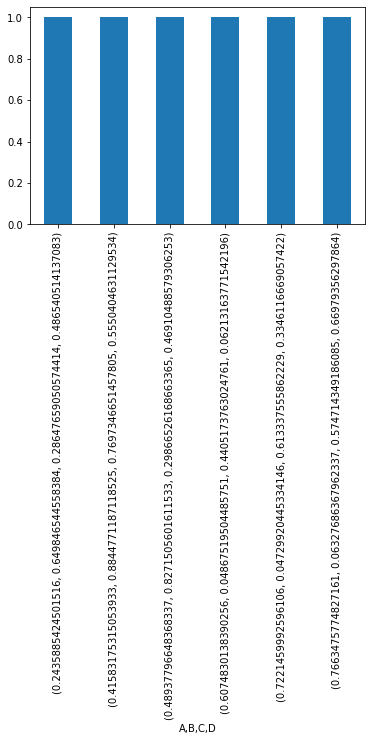

In [8]:
df.value_counts().plot(kind = 'bar')

Suppose we wanted to make a stacked bar plot showing the percentage of data points for each party size on each day. I load the data using read_csv and make a cross-tabulation by day and party size:

In [9]:
tips = pd.read_csv('../../../CSV Files/O_Reilly/ch08/tips.csv')

In [14]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [26]:
tips['day'].sum(0)

'SunSunSunSunSunSunSunSunSunSunSunSunSunSunSunSunSunSunSunSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatSunSunSunSunSunSunSunSunSunSunSunSunSunSunSunSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatThurThurThurThurThurThurThurThurThurThurThurThurThurFriFriFriFriFriFriFriFriFriFriFriFriSatSatSatSatSatSatSatSatSatSatSunSunSunSunSunThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurSunSunSunSunSunSunSunSunSunSunSunSunSunSunSunSunSunSunSatSatSatSatSunSunSunSunSunSunSunSunSunSunSunSunSunSunSunSunSunSunSunThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurSatSatSatSatSatSatSatSatSatSatSatSatSatSatFriFriFriFriFriFriFriSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatThur'

In [42]:
party_counts = pd.crosstab(tips['day'], tips.day)

In [43]:
party_counts

day,Fri,Sat,Sun,Thur
day,,,,
Fri,19,0,0,0
Sat,0,87,0,0
Sun,0,0,76,0
Thur,0,0,0,62


In [44]:
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, :]

In [45]:
party_counts

day,Fri,Sat,Sun,Thur
day,,,,
Fri,19,0,0,0
Sat,0,87,0,0
Sun,0,0,76,0
Thur,0,0,0,62


Then, normalize so t and makehat each row sums to 1 the plot

In [53]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(0).astype(float), axis=1)

In [54]:
party_pcts

day,Fri,Sat,Sun,Thur
day,,,,
Fri,1.0,0.0,0.0,0.0
Sat,0.0,1.0,0.0,0.0
Sun,0.0,0.0,1.0,0.0
Thur,0.0,0.0,0.0,1.0


<AxesSubplot:xlabel='day'>

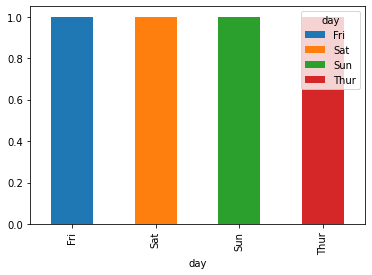

In [55]:
party_pcts.plot(kind='bar', stacked=True)